# K-means: Python analysis(In Class Exercise)
# Duo Zhou

### Code for extracting k clusters (k hard coded at 3 here) from k-means clustering
### Users need to puta simple for loop for changing values of k. Users need to change the directory where the data is located.

###  Getting external libraries

In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.set_printoptions(precision=3)

## read in comma-delimited text file, creating a pandas DataFrame object

In [2]:
CP_data = pd.read_csv(r'C:\Users\anilc\OneDrive\Desktop\Anil\Data Mining\Data sets\country_protein.csv')

## View the data as a dataframe and also as an array

In [3]:
#np.array(df.to_array()) could use this potentially to covnvert df to array
CP_data_array=CP_data.values
CP_data_frame = pd.DataFrame(CP_data_array[:,1:9],index = CP_data_array[:,0])
print(CP_data_frame)
print('\nDescriptive statistics for Country Protein data ---------------')
print(CP_data.describe())
print(CP_data_array)

                   0     1    2     3     4     5    6    7
Albania         10.1   1.4  0.5   8.9   0.2  42.3  0.6  5.5
Austria          8.9    14  4.3  19.9   2.1    28  3.6  1.3
Belgium         13.5   9.3  4.1  17.5   4.5  26.6  5.7  2.1
Bulgaria         7.8     6  1.6   8.3   1.2  56.7  1.1  3.7
Czechoslovakia   9.7  11.4  2.8  12.5     2  34.3    5  1.1
Denmark         10.6  10.8  3.7    25   9.9  21.9  4.8  0.7
E Germany        8.4  11.6  3.7  11.1   5.4  24.6  6.5  0.8
Finland          9.5   4.9  2.7  33.7   5.8  26.3  5.1    1
France            18   9.9  3.3  19.5   5.7  28.1  4.8  2.4
Greece          10.2     3  2.8  17.6   5.9  41.7  2.2  7.8
Hungary          5.3  12.4  2.9   9.7   0.3  40.1    4  5.4
Ireland         13.9    10  4.7  25.8   2.2    24  6.2  1.6
Italy              9   5.1  2.9  13.7   3.4  36.8  2.1  4.3
Netherlands      9.5  13.6  3.6  23.4   2.5  22.4  4.2  1.8
Norway           9.4   4.7  2.7  23.3   9.7    23  4.6  1.6
Poland           6.9  10.2  2.7  19.3   

In [4]:
# examine the structure of the DataFrame object
print('\nContents of Initial Data  ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(CP_data)) 
length = len(CP_data)
CP_data_for_cluster=CP_data_frame
CP_data_for_cluster = scale(CP_data_for_cluster)
print(CP_data_for_cluster)





Contents of Initial Data  ---------------

Number of Respondents = 25
[[ 0.083 -1.795 -2.225 -1.18  -1.225  0.935 -2.296  1.248]
 [-0.283  1.686  1.246  0.4   -0.655 -0.395 -0.422 -0.911]
 [ 1.12   0.388  1.063  0.056  0.065 -0.525  0.889 -0.5  ]
 [-0.618 -0.524 -1.22  -1.266 -0.925  2.274 -1.984  0.323]
 [-0.039  0.968 -0.124 -0.662 -0.685  0.191  0.452 -1.014]
 [ 0.235  0.802  0.698  1.133  1.685 -0.962  0.327 -1.219]
 [-0.435  1.023  0.698 -0.864  0.335 -0.711  1.389 -1.168]
 [-0.1   -0.828 -0.216  2.383  0.455 -0.553  0.515 -1.065]
 [ 2.492  0.554  0.332  0.343  0.425 -0.386  0.327 -0.345]
 [ 0.113 -1.353 -0.124  0.07   0.485  0.879 -1.297  2.43 ]
 [-1.381  1.244 -0.033 -1.065 -1.195  0.73  -0.172  1.197]
 [ 1.242  0.581  1.611  1.248 -0.625 -0.767  1.202 -0.757]
 [-0.252 -0.772 -0.033 -0.49  -0.265  0.423 -1.359  0.631]
 [-0.1    1.576  0.606  0.903 -0.535 -0.916 -0.047 -0.654]
 [-0.131 -0.883 -0.216  0.889  1.625 -0.86   0.202 -0.757]
 [-0.893  0.637 -0.216  0.314 -0.385  0.358 

## Fixing number of clusters at 3

In [5]:
k=3

## This is where K-means clustering is executed

In [6]:
x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(CP_data_for_cluster)
x.fit_predict(CP_data_for_cluster)

centroids = x.cluster_centers_
labels = x.labels_

## Printing the cluster centers and cluster indicators

In [8]:
print('\nCenters for the clusters are: ') 
print(centroids.T)
print('\nCluster Indicators for each data row are:') 
print(labels)


Centers for the clusters are: 
[[-0.688  0.461 -0.7  ]
 [-0.634  0.517 -1.104]
 [-0.933  0.588 -0.763]
 [-0.841  0.596 -1.017]
 [-0.745  0.121  1.135]
 [ 1.294 -0.623  0.095]
 [-1.234  0.361  1.077]
 [ 1.189 -0.719  0.82 ]]

Cluster Indicators for each data row are:
[0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 2 0 2 1 1 1 2 1 0]


## Computing cluster sizes - absolute values and proportions

In [9]:
centroids_dataframe = pd.DataFrame(data=centroids)
centroids_matrix = centroids_dataframe.values
#centroids_matrix = centroids_matrix.transpose()
print(centroids_matrix)
print("\nThe cluster sizes are", np.bincount(labels))
print("\nThe cluster proportions are", np.bincount(labels)/len(labels))

[[-0.688 -0.634 -0.933 -0.841 -0.745  1.294 -1.234  1.189]
 [ 0.461  0.517  0.588  0.596  0.121 -0.623  0.361 -0.719]
 [-0.7   -1.104 -0.763 -1.017  1.135  0.095  1.077  0.82 ]]

The cluster sizes are [ 7 15  3]

The cluster proportions are [0.28 0.6  0.12]


## Computing R-square for the solution

In [10]:
shap = (len(CP_data_for_cluster),k)
cluster_matrix = np.zeros(shap)

for i in range(k):     
    cluster_matrix[x.labels_ == i,i]=1.0

predicted_data= np.dot(cluster_matrix,centroids_matrix)
shap2 = (len(CP_data_for_cluster)*3,1)

print ("\nThe R-Square for", k, "clusters is", (np.corrcoef(predicted_data.ravel(), CP_data_for_cluster.ravel())[0,1])**2)


The R-Square for 3 clusters is 0.5306949175785118


## Generating scatter plots.

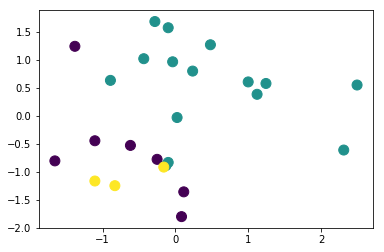

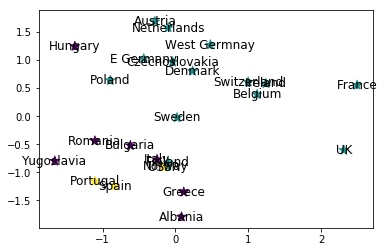

In [11]:
plt.scatter(CP_data_for_cluster[:, 0], CP_data_for_cluster[:, 1], c=labels, s=100, cmap='viridis')
plt.show()

colors = ["g.","r.","c.","y."]
plt.scatter(CP_data_for_cluster[:, 0], CP_data_for_cluster[:, 1], marker="*", c=labels, s=100, cmap='viridis')
for i, country in enumerate(CP_data_frame.index.values):
    plt.annotate(CP_data_frame.index.values[i], 
       xy = (CP_data_for_cluster[i, 0], CP_data_for_cluster[i, 1]),
       horizontalalignment='center',
       verticalalignment='center',
       size=12, weight='regular',
        ) 
plt.show()

## add labels

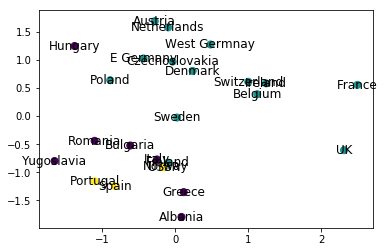

In [12]:
plt.scatter(CP_data_for_cluster[:, 0], CP_data_for_cluster[:, 1], c=labels, s=50, cmap='viridis')
for i, country in enumerate(CP_data_frame.index.values):
    
    plt.annotate(country, 
       xy = (CP_data_for_cluster[i, 0], CP_data_for_cluster[i, 1]),
       horizontalalignment='center',
       verticalalignment='center',
       size=12, weight='regular',
        ) 
plt.show()

# This is where Gaussian Mixture models are used for clustering

In [13]:
from sklearn.mixture import GaussianMixture

mymixture = GaussianMixture(n_components=3,n_init=50,random_state=13511)
mixresults=mymixture.fit(CP_data_for_cluster)
print(mixresults.means_)
print(mixresults.aic)
print(mixresults.bic)
print(mymixture.predict(CP_data_for_cluster))
labels = mymixture.predict(CP_data_for_cluster)
print(mymixture.predict_proba(CP_data_for_cluster))
print(mymixture.aic(CP_data_for_cluster))
print(mymixture.bic(CP_data_for_cluster))

[[-0.875 -0.286 -0.508 -0.76   0.365  0.275  0.814  0.621]
 [ 0.558  0.508  0.646  0.616  0.157 -0.693  0.314 -0.731]
 [-0.573 -0.947 -1.083 -0.804 -0.67   1.387 -1.411  1.188]]
<bound method GaussianMixture.aic of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=50, precisions_init=None,
        random_state=13511, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)>
<bound method GaussianMixture.bic of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=50, precisions_init=None,
        random_state=13511, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)>
[2 1 1 2 1 1 1 1 1 2 0 1 2 1 1 0 0 2 0 1 1 1 0 1 2]
[[0.000e+000 6.804e-043 1.000e+000]
 [0.000e+000 1.000e+000 0.000e+000]
 [0.000e+000 1.000e+000 0.000e+000]
 [0.000e+000 1.335e-